# Drifter Chain SBE56 Processing

In [1]:
from pathlib import Path
import numpy as np
import sbemoored
import xarray as xr
import gvpy as gv

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
sbe56_data_dir = Path("/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/sbe56/")
data_raw_dir = sbe56_data_dir.joinpath("raw")
files = sorted(data_raw_dir.glob("*.csv"))

In [3]:
data_proc_dir = sbe56_data_dir.joinpath("proc")
fig_dir = sbe56_data_dir.joinpath("fig")

In [5]:
tmpf = files[0]
tmpf

PosixPath('/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/sbe56/raw/SBE05600376_2024-05-22.csv')

reading csv file
Saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/sbe56/proc/SBE05600376_2024-05-22.nc


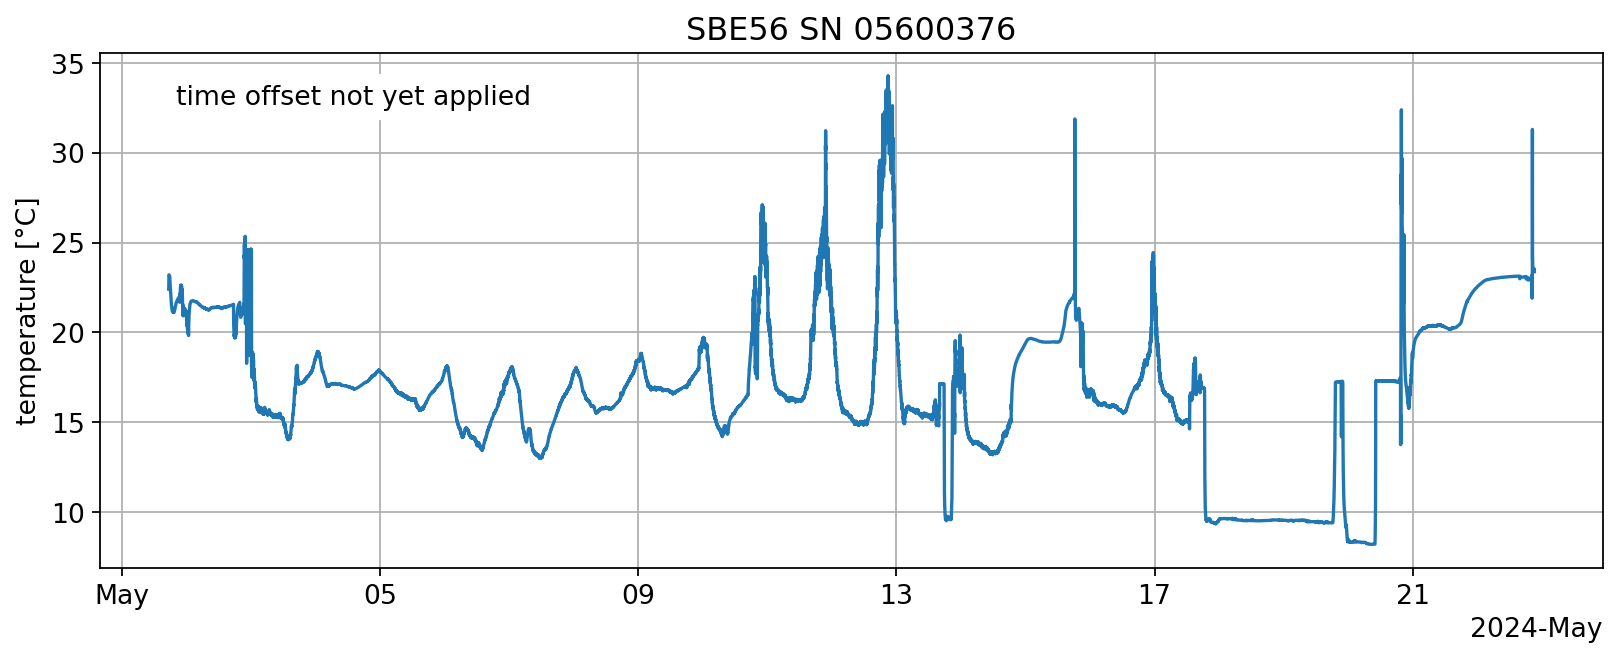

In [11]:
t = sbemoored.sbe56.proc(tmpf, data_out=data_proc_dir, figure_out=fig_dir)

Process all files.

In [13]:
if None:
    for file in files:
        t = sbemoored.sbe56.proc(file, data_out=data_proc_dir, figure_out=fig_dir)

Read all files.

In [14]:
files_nc = sorted(data_proc_dir.glob("*.nc"))

In [15]:
allt = [xr.open_dataarray(file) for file in files_nc]

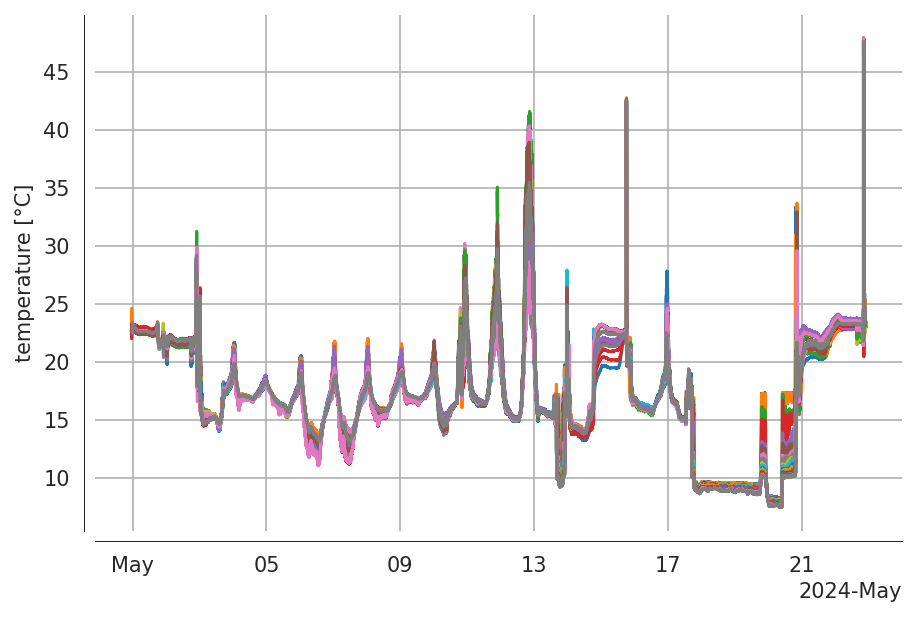

In [16]:
fig, ax = gv.plot.quickfig()
for ti in allt:
    ti.gv.plot(ax=ax)
ax.grid()

In [17]:
ts = slice("2024-05-17", "2024-05-22")
tt = [ti.sel(time=ts) for ti in allt]

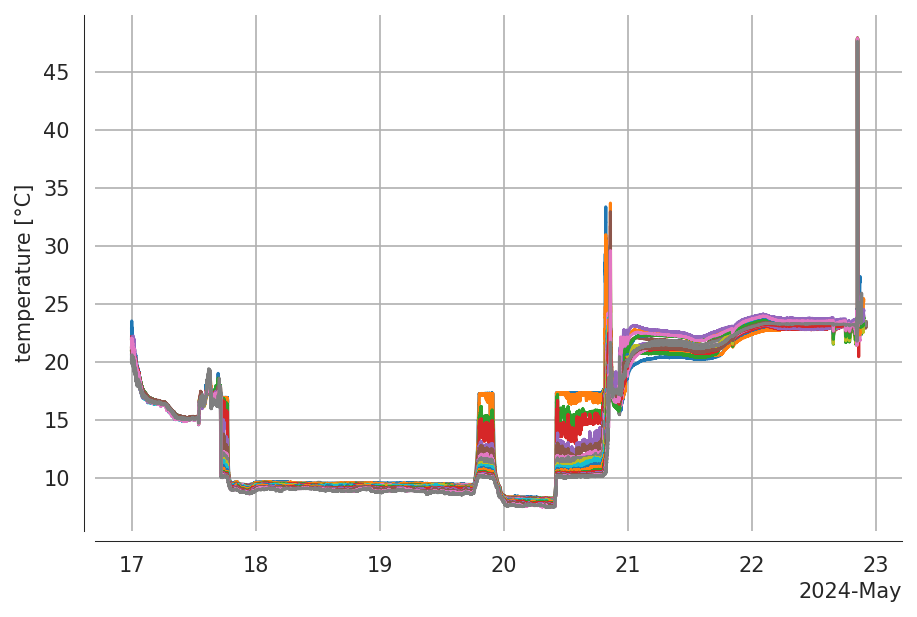

In [18]:
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.gv.plot(ax=ax)
ax.grid()

Plot clock calibration - everything within 2s.

saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/sbe56/fig/


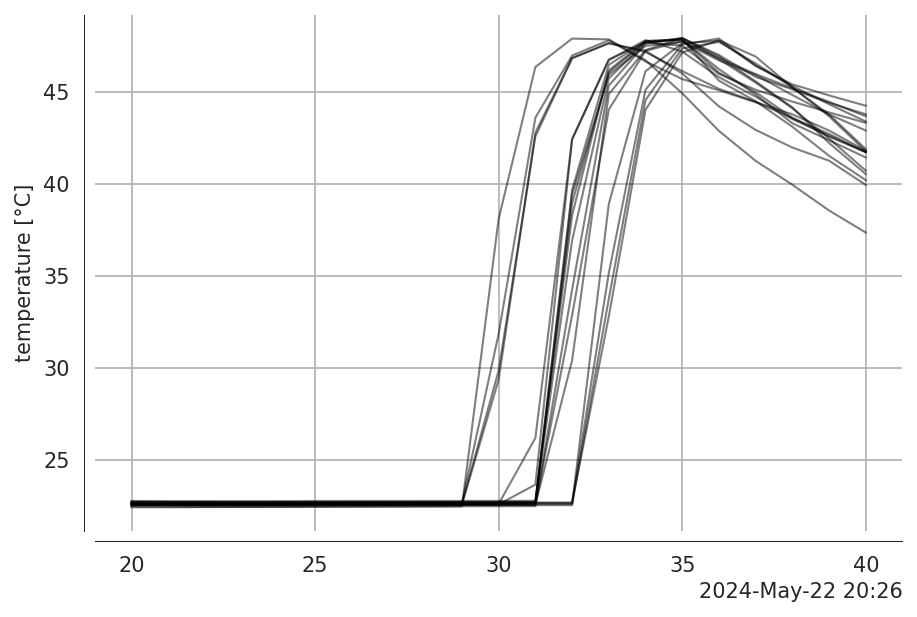

In [21]:
ts_dip = slice("2024-05-22 20:26:20", "2024-05-22 20:26:40")
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.sel(time=ts_dip).gv.plot(ax=ax, color="k", alpha=0.5, linewidth=1)
ax.grid()
gv.plot.png(fig_dir.joinpath("clock_verification.png"))

Sampling period was 1 Hz.

In [22]:
allt[0].gv.sampling_period

1

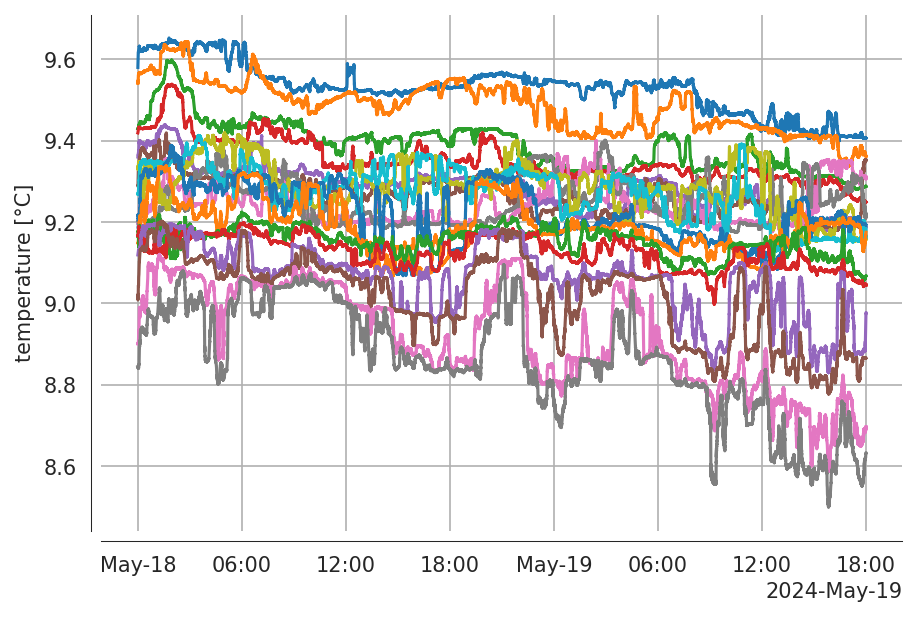

In [23]:
ts_dip = slice("2024-05-18", "2024-05-19 18:00")
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.sel(time=ts_dip).gv.plot(ax=ax)
ax.grid()